In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catch22 import catch22_all


In [16]:
tcn_valid_data = pd.read_csv('tcn1residual_data.csv')
pump_numbers = tcn_valid_data.pump_num.unique()

In [64]:
row_info = pd.DataFrame(catch22_all(this_pump)).set_index('names').T
row_info['names'] = '1'
row_info = row_info.set_index('names')
row_info

names,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
names,,,,,,,,,,,,,,,,,,,,,
1,0.291188,0.432582,13.0,29.0,0.600164,0.071003,0.207,81.0,0.333333,107.0,...,0.65,0.026973,-0.051948,0.979465,13.0,0.0,0.666667,0.520833,0.061359,0.298905


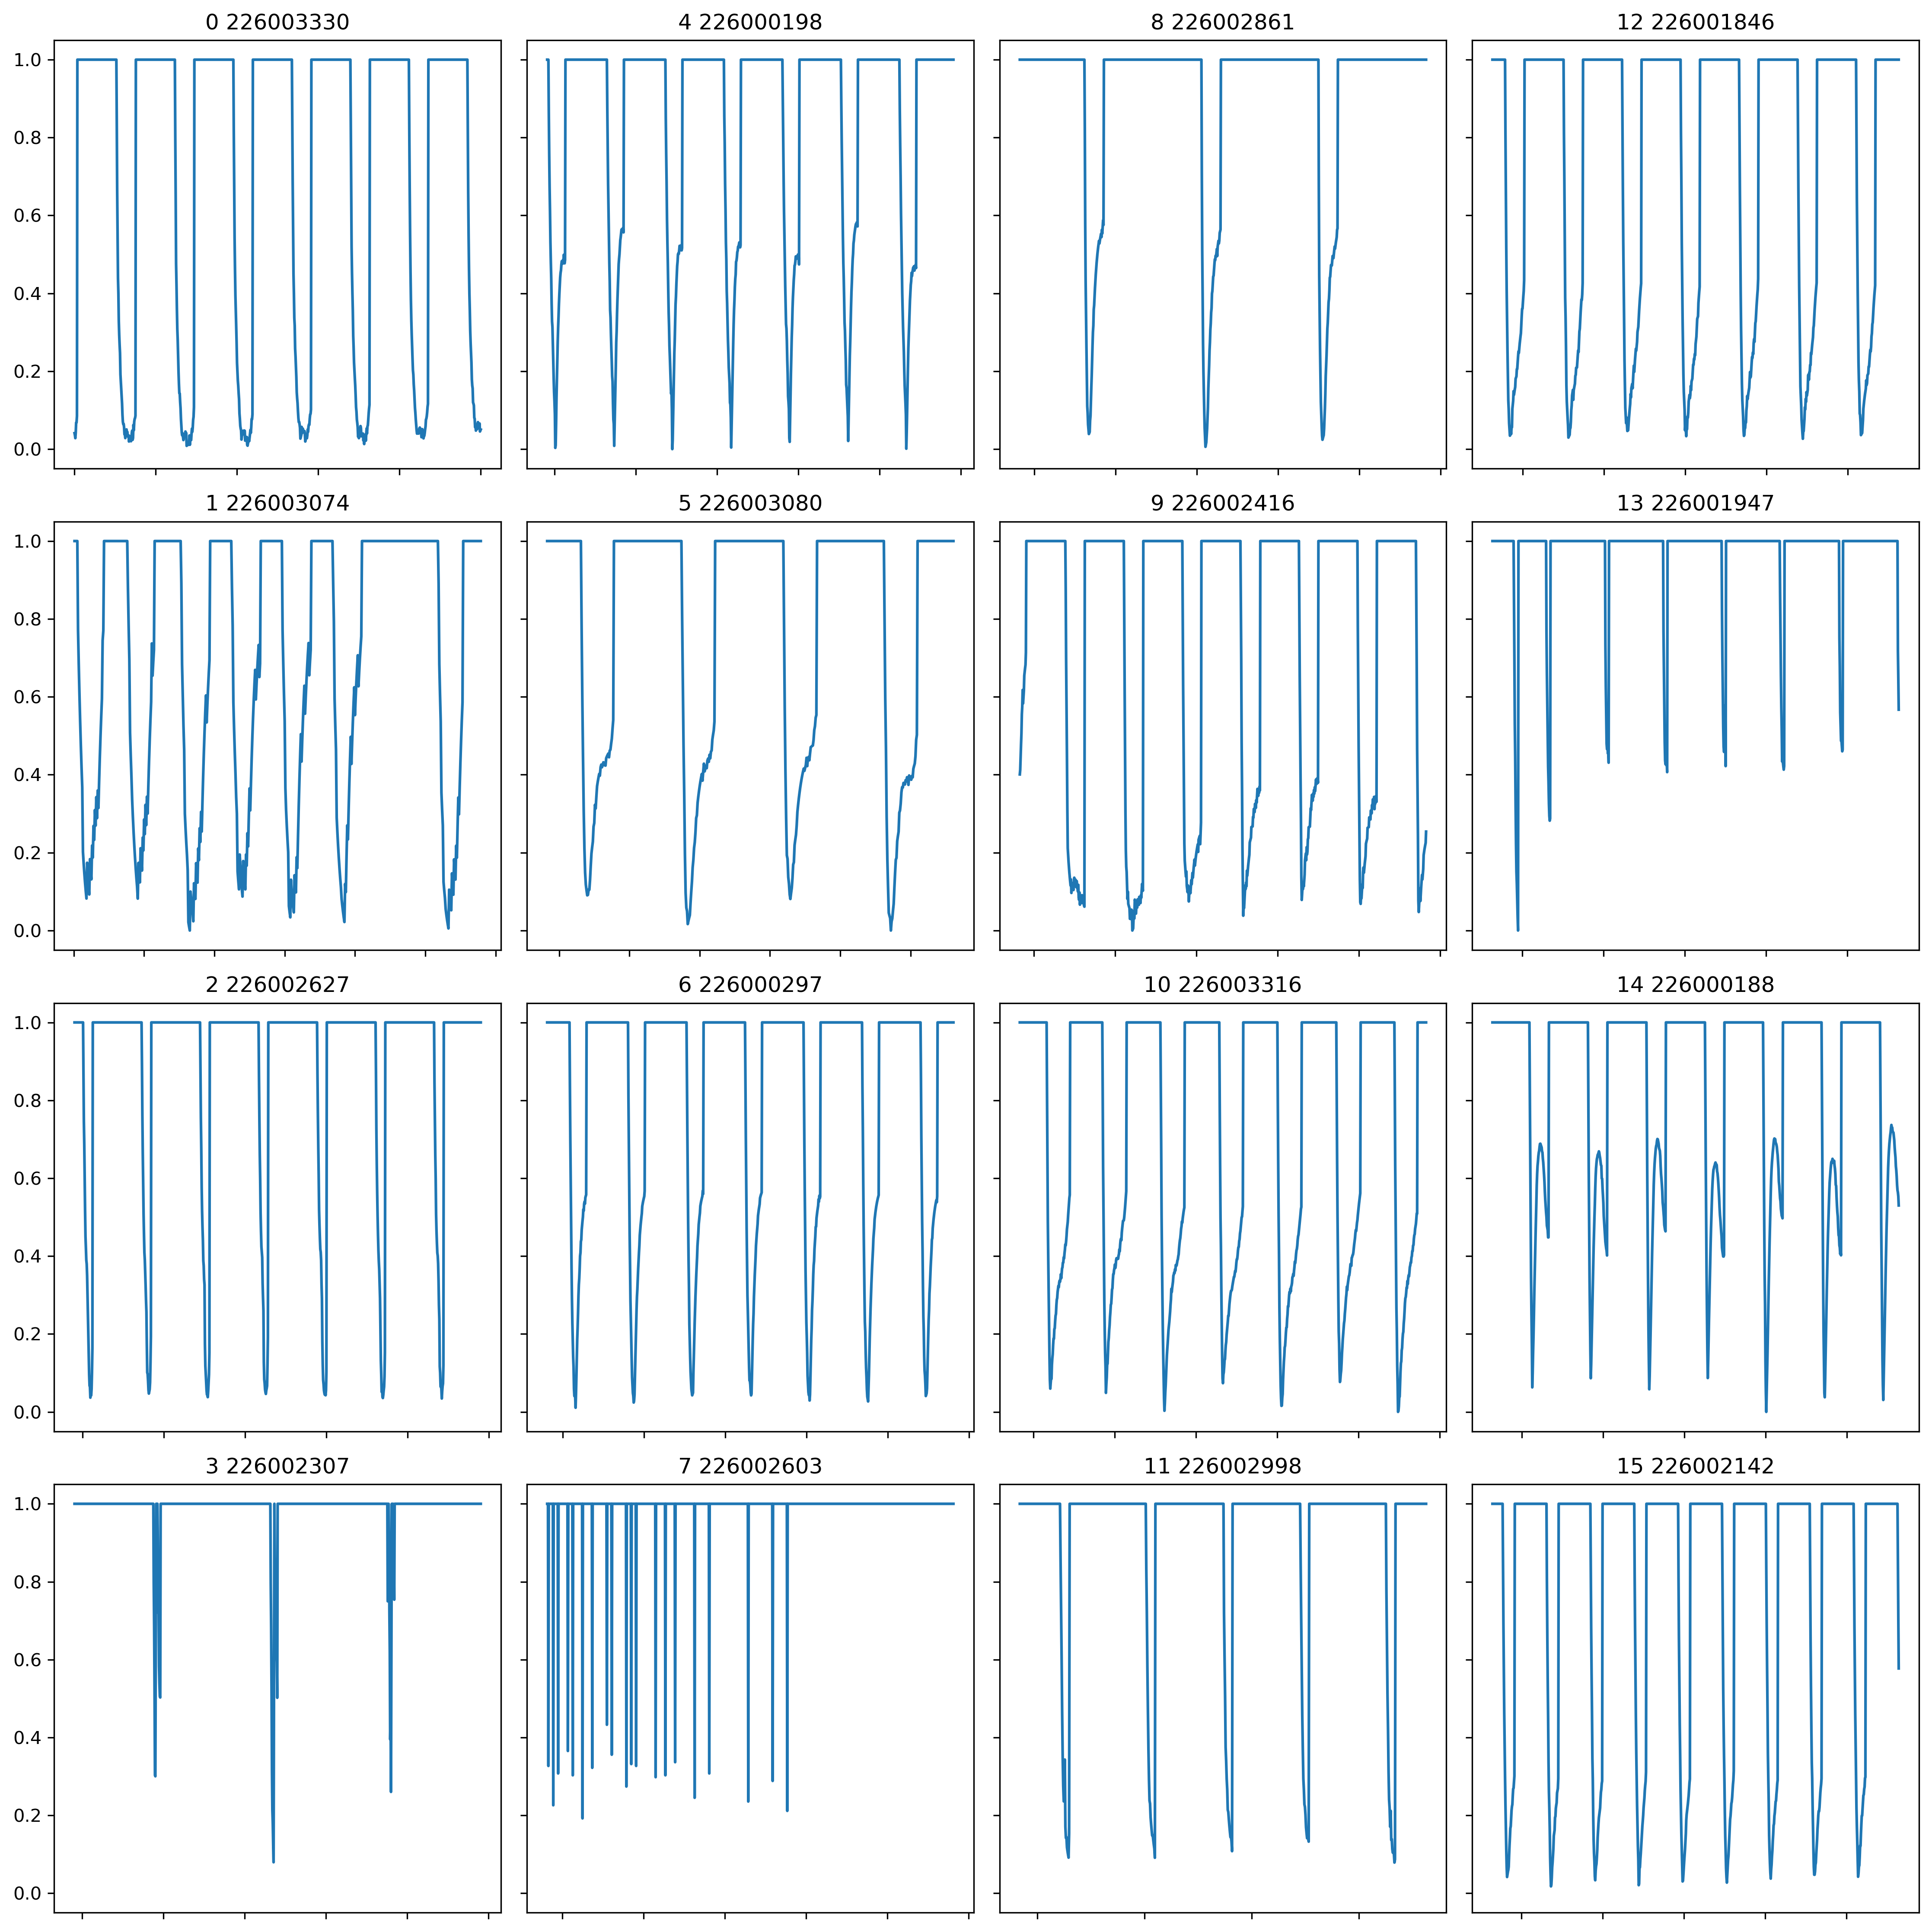

In [77]:
fig, axs = plt.subplots(4, 4, sharey=True, figsize=(15,15), dpi=300)
result_df = pd.DataFrame()
for pump in pump_numbers:
    this_pump = tcn_valid_data[tcn_valid_data.pump_num == pump]
    this_pump.true.plot(ax = axs[pump % 4, pump // 4])
    
    axs[pump % 4, pump // 4].set_title(str(pump) + " " + str(this_pump.pump_name.head(1).iloc[0]))
    axs[pump % 4, pump // 4].set_xticklabels([])
    this_pump = this_pump['true']
    this_pump.to_csv(f'compengine/{pump}.csv', index=False)

    row_info = pd.DataFrame(catch22_all(this_pump)).set_index('names').T
    row_info['names'] = pump
    row_info = row_info.set_index('names')
    result_df = result_df.append(row_info)


fig.tight_layout()
plt.show()

In [206]:
result_df

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,tcn_smape,nbeats_smape,trans_smape,tcn_below_median,nbeats_below_median,trans_below_median,all_bad
names,,,,,,,,,,,,,,,,,,,,,
0,0.428802,0.548265,20.0,97.0,0.685614,0.070142,0.133000,99.0,0.070401,143.0,...,0.583333,0.042951,0.256423,0.088856,0.264783,0.103791,False,False,False,False
1,0.570984,0.709537,14.0,36.0,0.792191,0.004274,0.472318,114.0,0.055272,71.0,...,0.413043,0.085903,0.242929,0.110461,0.330197,0.140209,False,False,False,False
2,0.058057,0.233299,11.0,23.0,0.465132,0.201112,0.141000,123.0,0.333333,143.0,...,0.604167,0.085903,0.371529,0.044806,0.153517,0.033162,False,False,True,False
3,-0.801716,-0.309368,5.0,6.0,0.086776,0.650715,0.049000,272.0,0.333333,7.0,...,0.520833,0.171806,0.680095,0.014529,0.050258,0.021073,True,True,True,True
4,0.256099,0.424417,18.0,41.0,0.665363,0.029913,0.219000,105.0,0.333333,143.0,...,0.562500,0.042951,0.232843,0.033669,0.129848,0.042028,True,True,True,True
5,0.354130,0.507574,18.0,49.0,0.705378,0.015548,0.192042,99.0,0.061728,143.0,...,0.652174,0.049087,0.241661,0.036774,0.219793,0.058069,True,False,False,False
6,0.276614,0.435282,17.0,41.0,0.654955,0.017279,0.209000,105.0,0.333333,143.0,...,0.562500,0.042951,0.226949,0.024248,0.092145,0.034304,True,True,True,True
7,-0.678695,-0.268221,1.0,3.0,0.000409,0.000000,0.040000,408.0,0.333333,11.0,...,0.500000,1.570796,1.168090,0.048081,0.058519,0.034715,False,True,True,False
8,-0.032331,0.176497,23.0,160.0,0.438575,0.009730,0.105000,242.0,0.333333,287.0,...,0.708333,0.042951,0.213082,0.014463,0.142890,0.032948,True,True,True,True


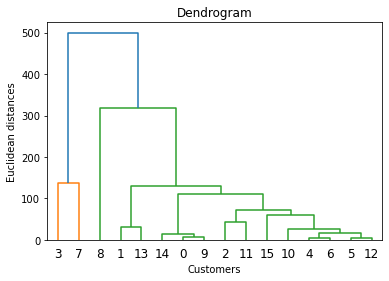

In [71]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(result_df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [72]:
result_df

names,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
names,,,,,,,,,,,,,,,,,,,,,
0,0.428802,0.548265,20.0,97.0,0.685614,0.070142,0.133000,99.0,0.070401,143.0,...,0.633333,-0.024975,0.101399,0.979956,21.0,0.000000,0.729167,0.583333,0.042951,0.256423
1,0.570984,0.709537,14.0,36.0,0.792191,0.004274,0.472318,114.0,0.055272,71.0,...,0.600000,0.210708,-0.174439,0.988168,18.0,0.749502,0.565217,0.413043,0.085903,0.242929
2,0.058057,0.233299,11.0,23.0,0.465132,0.201112,0.141000,123.0,0.333333,143.0,...,0.500000,0.023976,-0.063936,0.964060,20.0,0.000000,0.645833,0.604167,0.085903,0.371529
3,-0.801716,-0.309368,5.0,6.0,0.086776,0.650715,0.049000,272.0,0.333333,7.0,...,0.125000,0.015984,-0.021978,0.839158,9.0,0.000000,0.541667,0.520833,0.171806,0.680095
4,0.256099,0.424417,18.0,41.0,0.665363,0.029913,0.219000,105.0,0.333333,143.0,...,0.555556,0.041958,-0.092907,0.988693,19.0,0.000000,0.687500,0.562500,0.042951,0.232843
5,0.354130,0.507574,18.0,49.0,0.705378,0.015548,0.192042,99.0,0.061728,143.0,...,0.290323,0.000000,0.174439,0.988730,11.0,0.000000,0.739130,0.652174,0.049087,0.241661
6,0.276614,0.435282,17.0,41.0,0.654955,0.017279,0.209000,105.0,0.333333,143.0,...,0.444444,-0.039960,0.005994,0.991069,16.0,0.000000,0.666667,0.562500,0.042951,0.226949
7,-0.678695,-0.268221,1.0,3.0,0.000409,0.000000,0.040000,408.0,0.333333,11.0,...,1.000000,0.016983,-0.596404,0.196141,2.0,0.000000,0.875000,0.500000,1.570796,1.168090
8,-0.032331,0.176497,23.0,160.0,0.438575,0.009730,0.105000,242.0,0.333333,287.0,...,0.256410,0.047952,-0.066933,0.991470,12.0,0.000000,0.562500,0.708333,0.042951,0.213082


считаем данные по качеству для tcn, трансформера и nbeats

In [88]:
tcninfo = pd.read_csv('tcn1/by_pump_valid_metrics.csv')
tcninfo.rename(columns={'smape':'tcn_smape'}, inplace=True)

nbeatsinfo = pd.read_csv('nbeats1/by_pump_valid_metrics.csv')
nbeatsinfo.rename(columns={'smape':'nbeats_smape'}, inplace=True)

transformerinfo = pd.read_csv('trans1/by_pump_valid_metrics.csv')
transformerinfo.rename(columns={'smape':'trans_smape'}, inplace=True)

In [89]:
result_df = result_df.join(tcninfo.tcn_smape)
result_df = result_df.join(nbeatsinfo.nbeats_smape)
result_df = result_df.join(transformerinfo.trans_smape)


In [97]:
result_df['tcn_below_median'] = result_df.tcn_smape < result_df.tcn_smape.median()
result_df['nbeats_below_median'] = result_df.nbeats_smape < result_df.nbeats_smape.median()
result_df['trans_below_median'] = result_df.trans_smape < result_df.trans_smape.median()
result_df['all_bad'] = result_df['tcn_below_median'] & result_df['nbeats_below_median'] & result_df['trans_below_median']

In [98]:
result_df

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,tcn_smape,nbeats_smape,trans_smape,tcn_below_median,nbeats_below_median,trans_below_median,all_bad
names,,,,,,,,,,,,,,,,,,,,,
0,0.428802,0.548265,20.0,97.0,0.685614,0.070142,0.133000,99.0,0.070401,143.0,...,0.583333,0.042951,0.256423,0.088856,0.264783,0.103791,False,False,False,False
1,0.570984,0.709537,14.0,36.0,0.792191,0.004274,0.472318,114.0,0.055272,71.0,...,0.413043,0.085903,0.242929,0.110461,0.330197,0.140209,False,False,False,False
2,0.058057,0.233299,11.0,23.0,0.465132,0.201112,0.141000,123.0,0.333333,143.0,...,0.604167,0.085903,0.371529,0.044806,0.153517,0.033162,False,False,True,False
3,-0.801716,-0.309368,5.0,6.0,0.086776,0.650715,0.049000,272.0,0.333333,7.0,...,0.520833,0.171806,0.680095,0.014529,0.050258,0.021073,True,True,True,True
4,0.256099,0.424417,18.0,41.0,0.665363,0.029913,0.219000,105.0,0.333333,143.0,...,0.562500,0.042951,0.232843,0.033669,0.129848,0.042028,True,True,True,True
5,0.354130,0.507574,18.0,49.0,0.705378,0.015548,0.192042,99.0,0.061728,143.0,...,0.652174,0.049087,0.241661,0.036774,0.219793,0.058069,True,False,False,False
6,0.276614,0.435282,17.0,41.0,0.654955,0.017279,0.209000,105.0,0.333333,143.0,...,0.562500,0.042951,0.226949,0.024248,0.092145,0.034304,True,True,True,True
7,-0.678695,-0.268221,1.0,3.0,0.000409,0.000000,0.040000,408.0,0.333333,11.0,...,0.500000,1.570796,1.168090,0.048081,0.058519,0.034715,False,True,True,False
8,-0.032331,0.176497,23.0,160.0,0.438575,0.009730,0.105000,242.0,0.333333,287.0,...,0.708333,0.042951,0.213082,0.014463,0.142890,0.032948,True,True,True,True


In [147]:
df = result_df[['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_f1ecac',
       'CO_FirstMin_ac', 'CO_HistogramAMI_even_2_5', 'CO_trev_1_num',
       'MD_hrv_classic_pnn40', 'SB_BinaryStats_mean_longstretch1',
       'SB_TransitionMatrix_3ac_sumdiagcov', 'PD_PeriodicityWang_th0_01',
       'CO_Embed2_Dist_tau_d_expfit_meandiff',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi',
       'FC_LocalSimple_mean1_tauresrat', 'DN_OutlierInclude_p_001_mdrmd',
       'DN_OutlierInclude_n_001_mdrmd', 'SP_Summaries_welch_rect_area_5_1',
       'SB_BinaryStats_diff_longstretch0', 'SB_MotifThree_quantile_hh',
       'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
       'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
       'SP_Summaries_welch_rect_centroid', 'FC_LocalSimple_mean3_stderr', 'trans_below_median']]

In [148]:
df.groupby('trans_below_median').mean().T

trans_below_median,False,True
DN_HistogramMode_5,0.361448,-0.140455
DN_HistogramMode_10,0.506837,0.130195
CO_f1ecac,16.875000,11.750000
CO_FirstMin_ac,58.875000,52.375000
CO_HistogramAMI_even_2_5,0.671437,0.401315
CO_trev_1_num,0.076120,0.219208
MD_hrv_classic_pnn40,0.204083,0.135125
SB_BinaryStats_mean_longstretch1,103.000000,186.125000
SB_TransitionMatrix_3ac_sumdiagcov,0.130256,0.300069
PD_PeriodicityWang_th0_01,129.375000,119.375000


In [149]:
df.columns

Index(['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_f1ecac',
       'CO_FirstMin_ac', 'CO_HistogramAMI_even_2_5', 'CO_trev_1_num',
       'MD_hrv_classic_pnn40', 'SB_BinaryStats_mean_longstretch1',
       'SB_TransitionMatrix_3ac_sumdiagcov', 'PD_PeriodicityWang_th0_01',
       'CO_Embed2_Dist_tau_d_expfit_meandiff',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi',
       'FC_LocalSimple_mean1_tauresrat', 'DN_OutlierInclude_p_001_mdrmd',
       'DN_OutlierInclude_n_001_mdrmd', 'SP_Summaries_welch_rect_area_5_1',
       'SB_BinaryStats_diff_longstretch0', 'SB_MotifThree_quantile_hh',
       'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
       'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
       'SP_Summaries_welch_rect_centroid', 'FC_LocalSimple_mean3_stderr',
       'trans_below_median'],
      dtype='object')

In [209]:
catch22columns = ['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_f1ecac',
       'CO_FirstMin_ac', 'CO_HistogramAMI_even_2_5', 'CO_trev_1_num',
       'MD_hrv_classic_pnn40', 'SB_BinaryStats_mean_longstretch1',
       'SB_TransitionMatrix_3ac_sumdiagcov', 'PD_PeriodicityWang_th0_01',
       'CO_Embed2_Dist_tau_d_expfit_meandiff',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi',
       'FC_LocalSimple_mean1_tauresrat', 'DN_OutlierInclude_p_001_mdrmd',
       'DN_OutlierInclude_n_001_mdrmd', 'SP_Summaries_welch_rect_area_5_1',
       'SB_BinaryStats_diff_longstretch0', 'SB_MotifThree_quantile_hh',
       'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
       'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
       'SP_Summaries_welch_rect_centroid', 'FC_LocalSimple_mean3_stderr']
significant_ones = ['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_HistogramAMI_even_2_5',
       'SB_TransitionMatrix_3ac_sumdiagcov']

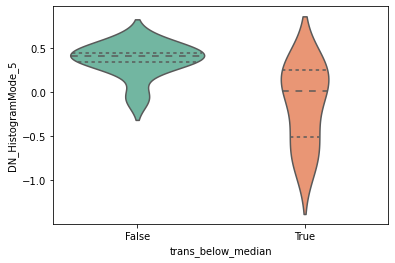

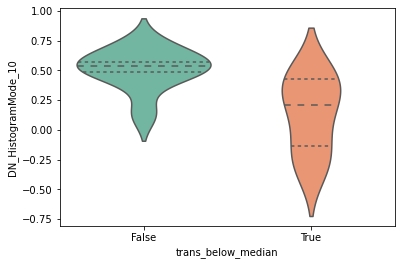

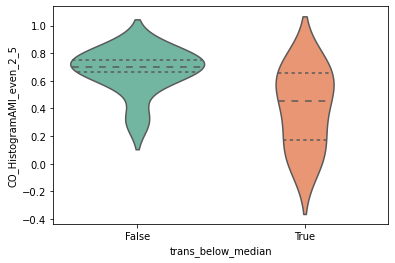

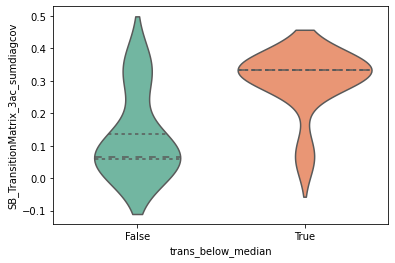

In [210]:
import seaborn as sns
from scipy import stats
for column in significant_ones:
    fig, ax = plt.subplots()
    # the size of A4 paper
    # fig.set_size_inches( 8.27, 11.7)
    sns.violinplot( y=column, x='trans_below_median', data=result_df, inner="quartile", palette="Set2")
    

what models do fail when?

In [199]:
where_do_fail = pd.DataFrame()

In [200]:
values_loop = {}
for column in catch22columns:
    values_loop[column] =stats.ttest_ind(result_df[-result_df.trans_below_median][column], result_df[result_df.trans_below_median][column], equal_var=False)[1]
where_do_fail = pd.DataFrame(values_loop, index=['trans']).T
where_do_fail


,trans
DN_HistogramMode_5,0.015071
DN_HistogramMode_10,0.012908
CO_f1ecac,0.120809
CO_FirstMin_ac,0.756698
CO_HistogramAMI_even_2_5,0.034984
CO_trev_1_num,0.263080
MD_hrv_classic_pnn40,0.185690
SB_BinaryStats_mean_longstretch1,0.074279
SB_TransitionMatrix_3ac_sumdiagcov,0.009079
PD_PeriodicityWang_th0_01,0.770163


In [201]:
values_loop = {}
for column in catch22columns:
    values_loop[column] =stats.ttest_ind(result_df[-result_df.tcn_below_median][column], result_df[result_df.tcn_below_median][column], equal_var=False)[1]
where_do_fail = where_do_fail.join(pd.DataFrame(values_loop, index=['tcn']).T)


values_loop = {}
for column in catch22columns:
    values_loop[column] =stats.ttest_ind(result_df[-result_df.nbeats_below_median][column], result_df[result_df.nbeats_below_median][column], equal_var=False)[1]
where_do_fail = where_do_fail.join(pd.DataFrame(values_loop, index=['nbeats']).T)
where_do_fail

,trans,tcn,nbeats
DN_HistogramMode_5,0.015071,0.199686,0.010161
DN_HistogramMode_10,0.012908,0.194820,0.008116
CO_f1ecac,0.120809,0.685683,0.088088
CO_FirstMin_ac,0.756698,0.507353,0.914516
CO_HistogramAMI_even_2_5,0.034984,0.327320,0.016642
CO_trev_1_num,0.263080,0.146536,0.155556
MD_hrv_classic_pnn40,0.185690,0.428918,0.119229
SB_BinaryStats_mean_longstretch1,0.074279,0.807709,0.057189
SB_TransitionMatrix_3ac_sumdiagcov,0.009079,0.146661,0.009079
PD_PeriodicityWang_th0_01,0.770163,0.494926,0.770163


In [203]:
significant = where_do_fail<0.05
significant

,trans,tcn,nbeats
DN_HistogramMode_5,True,False,True
DN_HistogramMode_10,True,False,True
CO_f1ecac,False,False,False
CO_FirstMin_ac,False,False,False
CO_HistogramAMI_even_2_5,True,False,True
CO_trev_1_num,False,False,False
MD_hrv_classic_pnn40,False,False,False
SB_BinaryStats_mean_longstretch1,False,False,False
SB_TransitionMatrix_3ac_sumdiagcov,True,False,True
PD_PeriodicityWang_th0_01,False,False,False


в этих характерисктиках есть разница между работой подходов

In [208]:
where_do_fail [significant.trans | significant.tcn | significant.nbeats]

,trans,tcn,nbeats
DN_HistogramMode_5,0.015071,0.199686,0.010161
DN_HistogramMode_10,0.012908,0.194820,0.008116
CO_HistogramAMI_even_2_5,0.034984,0.327320,0.016642
SB_TransitionMatrix_3ac_sumdiagcov,0.009079,0.146661,0.009079


* DN_HistogramMode_5: Mode of the z-scored distribution estimated using a 5-bin histogram.
* DN_HistogramMode_10: Mode of the z-scored distribution estimated using a 10-bin histogram
* CO_HistogramAMI_even_2_5: Automutual information, m = 2, τ = 5.
* SB_TransitionMatrix_3ac_sumdiagcov: The trace of the covariance of the transition matrix between symbols in 3-letter alphabet.